<a href="https://colab.research.google.com/github/Biline-dev/IARN/blob/main/TP_2_Descente_du_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Réalisé par:

Boulmaali Linda Imene, 181832040766

# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1zwphD42T3IF_3PzHM-z54jiVBltJ1ebD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('dataMulti.csv') 

In [ ]:
downloaded = drive.CreateFile({'id':'1eLcjnGHKNCoWvInxUxs6dSrKJqYdqUrA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv') 

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=np.int8)
m, n =data.shape
print(m,n)

97 2


Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];
y=y.reshape(y.shape[0],1)

Text(0, 0.5, 'Bénéfice x1000')

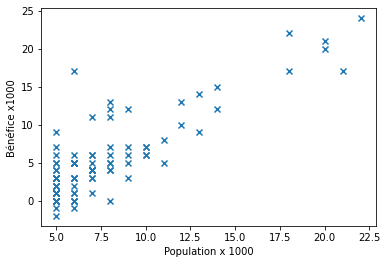

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, y, theta): 
  # cost function
  cost = 0
  for i in range(m):
      hypo_i = 0
      for j in range(n):
          hypo_i += theta[j]*X[i,j]
      cost_i = (hypo_i - y[i])**2
      cost += cost_i
  cost = (1/(2*m))*cost

  return cost

In [ ]:
def computeCost(X, y, theta):
  # cost function
  return 1/(2*m)*np.sum(np.power((X@theta- y), 2))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations): 
    %%time
    cost_history = [] 
    theta_history = []

    for iter in range(iterations):
      cost_history.append(computeCostNonVect(X, y, theta))
      hypothesis = np.dot(X,theta)
      diff = hypothesis-y
      diff_=(X*diff)
      theta_=diff_.mean(axis=0)
      theta_=theta_.reshape(theta_.shape[0],1)
      for i in range(len(theta)):
        theta[i] = theta[i]  - (1 / m) * alpha *np.sum(diff_[:,i])
      
      theta_history.append(theta_)

    return theta,  np.array(cost_history), np.array(theta_history)



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCostNonVect=computeCostNonVect(X, y, theta)
print(initialCost)
print(initialCostNonVect)

4.274256609432116
[4.27425661]


Appel des la fonction de calcul du gradient

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
[[29.25773196]
 [ 7.21782174]
 [ 5.83957984]
 ...
 [ 4.27430721]
 [ 4.27429028]
 [ 4.27427341]]


Text(0, 0.5, 'cost')

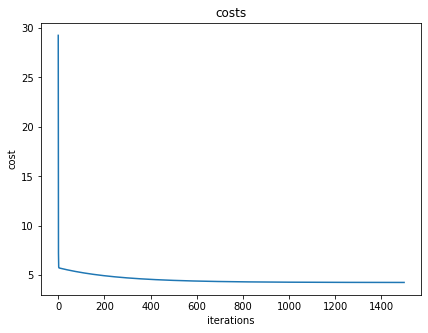

In [ ]:
# paramètres
theta = np.zeros((2, 1))
iterations = 1500;
alpha = 0.01;
# Appel
theta, cost_history,  theta_history = gradientDescent(X, y, theta, alpha, iterations);
print(cost_history)
#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_history.shape[0]), cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

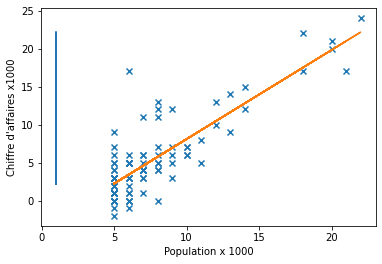

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

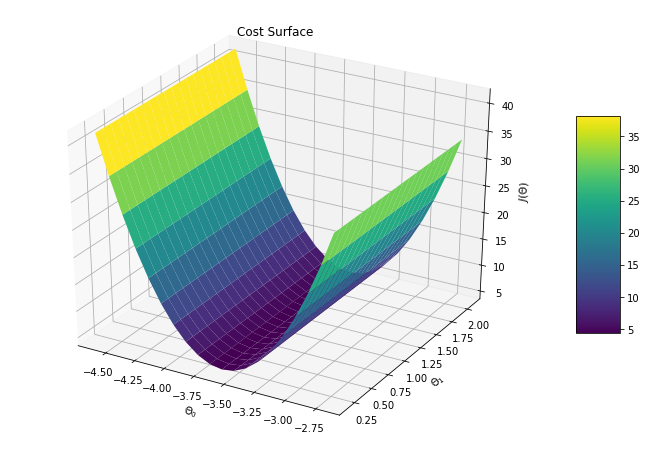

In [ ]:
theta_0, theta_1 = np.meshgrid(np.arange(theta[0] - 1, theta[0] + 1, 0.1), 
                                            np.arange(theta[1] - 1, theta[1] + 1, 0.1))
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        k=np.array([theta_0[i].mean(axis=0), theta_1[j].mean(axis=0)])
        k=k.reshape(k.shape[0], 1)
        t = np.concatenate((k, theta[2:]), axis=0)
        cost_values[i, j] = computeCostNonVect(X, y, t)

fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,300)

plt.show()

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.49898053])

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.59767717])

* Comparaison de l'algorithme avec celui de sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
sklearn_model_simple = LinearRegression()
sklearn_model_simple.fit(X, y)
print("sklearn model  :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("Notre modele   :", theta[0],theta[1] )

sklearn model  : (array([0.        , 1.19285652]), -3.8087580729621244)
Notre modele   : [-3.59971611] [1.17105618]


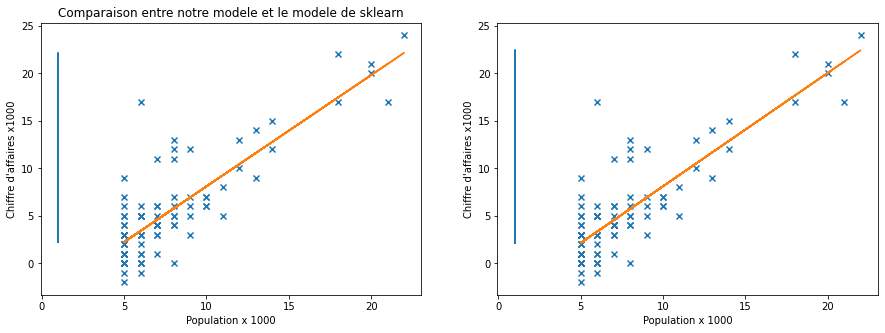

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)

plt.title("Comparaison entre notre modele et le modele de sklearn")

plt.subplot(1, 2, 2)
plt.scatter(X[:,1], y, marker ='x')
y_pred = sklearn_model_simple.predict(X)
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)


# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
m, n=dataMulti.shape

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:, :2]))
y = dataMulti[:, 2:]


Mise à l'échelle des données

In [ ]:
X_max, X_min = X[:, 1:].max(axis=0), X[:, 1:].min(axis=0)
X_normalized = (X[:, 1:] - X_min) / (X_max - X_min)
X_normalized=np.column_stack((intercept,X_normalized[:, :2]))
y_max, y_min = y.max(), y.min()
y_normalized = (y - y_max) / (y_max - y_min)

Normalisation des données en moyenne = 0

In [ ]:
X_mean, X_std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_normalized_0 = (X[:, 1:] - X_mean) / X_std
X_normalized_0=np.column_stack((intercept,X_normalized_0[:, :2]))
y_mean, y_std = y.mean(), y.std()
y_normalized_0 = (y - y_mean) / y_std


Appliquer la descente du gradient à plusieurs variables

### Sans normalisation

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.01
theta = np.zeros((X.shape[1], 1))
# Appel
theta, cost_history, theta_history = gradientDescent(X, y, theta, alpha, iterations)
print(cost_history)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


[[6.55915857e+10]
 [1.34926946e+20]
 [2.88086850e+29]
 ...
 [           nan]
 [           nan]
 [           nan]]


***Remarque***: La régession linéaire ne converge pas avec un taux d'apprentissage égale à 0.01, le gradient devient trés grand et cause une erreur d'overflow dans le programme.


* En utilisant un taux d'apprentissage plus petit

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
[[6.55915857e+10]
 [6.50089178e+10]
 [6.44316222e+10]
 ...
 [2.39792134e+09]
 [2.39792078e+09]
 [2.39792023e+09]]


Text(0, 0.5, 'cost')

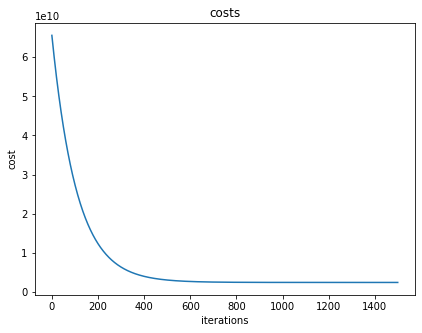

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.000000001
theta = np.zeros((X.shape[1], 1))
# Appel
theta, cost_history, theta_history = gradientDescent(X, y, theta, alpha, iterations)
print(cost_history)
#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_history.shape[0]), cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')

* Comparaison de l'algorithme avec celui de sklearn

In [ ]:
sklearn_model_simple = LinearRegression()
sklearn_model_simple.fit(X, y)
print("sklearn model  :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("Notre modele   :", theta[0],theta[1])

sklearn model  : (array([[    0.        ,   139.21063465, -8737.91542019]]), array([89597.765961]))
Notre modele   : [0.0858372] [165.22388945]


### Avec normalisation

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
[[0.25726841]
 [0.25665782]
 [0.25604896]
 ...
 [0.04053614]
 [0.04052442]
 [0.04051272]]


Text(0, 0.5, 'cost')

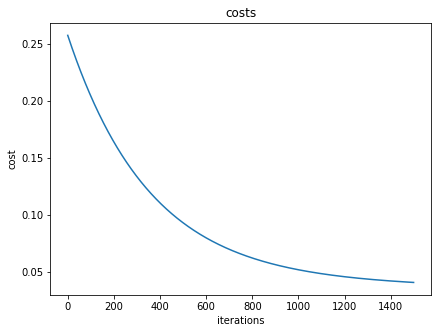

In [ ]:
# paramètres
iterations = 1500
alpha = 0.001
theta = np.zeros((X.shape[1], 1))
# Appel
theta, cost_normalized, theta_normalized  = gradientDescent(X_normalized, y_normalized, theta, alpha, iterations)
print(cost_normalized)
#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized.shape[0]), cost_normalized)
plt.xlabel('iterations')
plt.ylabel('cost')

* Comparaison de l'algorithme avec celui de sklearn

In [ ]:
sklearn_model_simple = LinearRegression()
sklearn_model_simple.fit(X_normalized, y_normalized)
print("sklearn model  :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("Notre modele   :", theta[0],theta[1], theta[2])

sklearn model  : (array([[ 0.        ,  0.95241087, -0.06594653]]), array([-0.94421262]))
Notre modele   : [-0.44433562] [-0.06717635] [-0.20265525]


### Avec normalisation en moyenne = 0

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs
[[0.5       ]
 [0.49907408]
 [0.49815085]
 ...
 [0.1619558 ]
 [0.16192516]
 [0.16189455]]


Text(0, 0.5, 'cost')

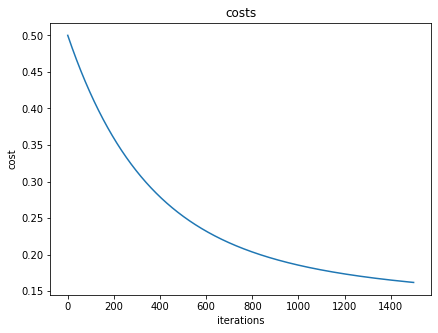

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.001
theta = np.zeros((X.shape[1], 1))
# Appel
theta, cost_normalized_0, theta_normalized_0 = gradientDescent(X_normalized_0, 
                                                                                 y_normalized_0, 
                                                                                 theta, alpha, 
                                                                                 iterations)
print(cost_normalized_0)

#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized_0.shape[0]), cost_normalized_0)
plt.xlabel('iterations')
plt.ylabel('cost')

* Comparaison de l'algorithme avec celui de sklearn

In [ ]:
sklearn_model_simple = LinearRegression()
sklearn_model_simple.fit(X_normalized_0, y_normalized_0)
print("sklearn model  :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("Notre modele   :", theta[0],theta[1])

sklearn model  : (array([[ 0.        ,  0.88476566, -0.05317818]]), array([-1.01283587e-16]))
Notre modele   : [-1.44626627e-16] [0.60244274]


### Compariason entre la descente du gradient avec et sans normalisation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


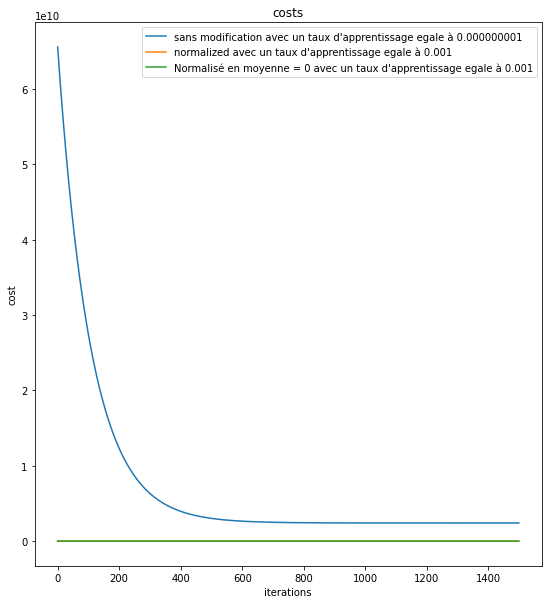

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_history.shape[0]), cost_history, label='sans modification avec un taux d\'apprentissage egale à 0.000000001')
plt.xlabel('iterations')
plt.ylabel('cost')

plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized.shape[0]), cost_normalized, label='normalized avec un taux d\'apprentissage egale à 0.001')
plt.xlabel('iterations')
plt.ylabel('cost')

plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized_0.shape[0]), cost_normalized_0, label='Normalisé en moyenne = 0 avec un taux d\'apprentissage egale à 0.001')
plt.xlabel('iterations')
plt.ylabel('cost')

plt.legend()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

On pourrait utilisé la régression polynomiale qui est une forme de régression linéair, 
La régression polynomiale est une forme de régression linéaire dans laquelle la relation entre la variable indépendante
 x et la variable dépendante y est modélisée sous la forme d'un polynôme de degré n. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin = LinearRegression()
lin.fit(X, y)
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

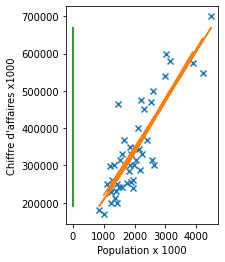

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(X[:,1], y, marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,lin.predict(X))

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance